## Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Reading and Understanding the Data

In [4]:
cars=pd.read_csv("CarPrice_Assignment.csv")

In [5]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<font color=green>**Derived metric:Extracting company name from CarName as Brand.**

In [6]:
cars['Brand']=cars['CarName'].str.split(" ",-1,expand=True)[0]

In [7]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [8]:
cars=cars.drop(['CarName'],axis=1)

In [9]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [10]:
cars.shape

(205, 26)

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

**Above result shows that there are No null values in the dataset.**

In [12]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<font color=green>**Checking unique values in each column.**

In [13]:
cars.astype('object').describe(include='all').loc['unique', :]

car_ID              205
symboling             6
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
Brand                28
Name: unique, dtype: object

<font color=green>**Each column has 2 more types of values hence analysis will be required for each of the columns.**

## Step 2: Data Preparation

**Treating data inconsistencies in Brand column as the company name spellings are written incorrect or shortened at some places.**

In [14]:
cars['Brand'] = cars['Brand'].replace(['vokswagen', 'vw'], 'volkswagen')
cars['Brand'] = cars['Brand'].replace(['toyouta'], 'toyota')
cars['Brand'] = cars['Brand'].replace(['porcshce'], 'porsche')
cars['Brand'] = cars['Brand'].replace(['maxda'], 'mazda')
cars['Brand'] = cars['Brand'].replace(['toyouta'], 'toyota')

In [15]:
cars.groupby('Brand').Brand.count().sort_values(ascending=False)

Brand
toyota         32
mazda          17
nissan         17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Nissan          1
Name: Brand, dtype: int64

**This shows that Toyota has maximum number of Cars in the Dataset provided.**

In [16]:
cars.groupby('cylindernumber').Brand.count().sort_values(ascending=False)

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: Brand, dtype: int64

**This shows that maximum cars have four cylinders.**

**Brand and Price**

<font color=green> **Checking Price distribution across different Car companies.**

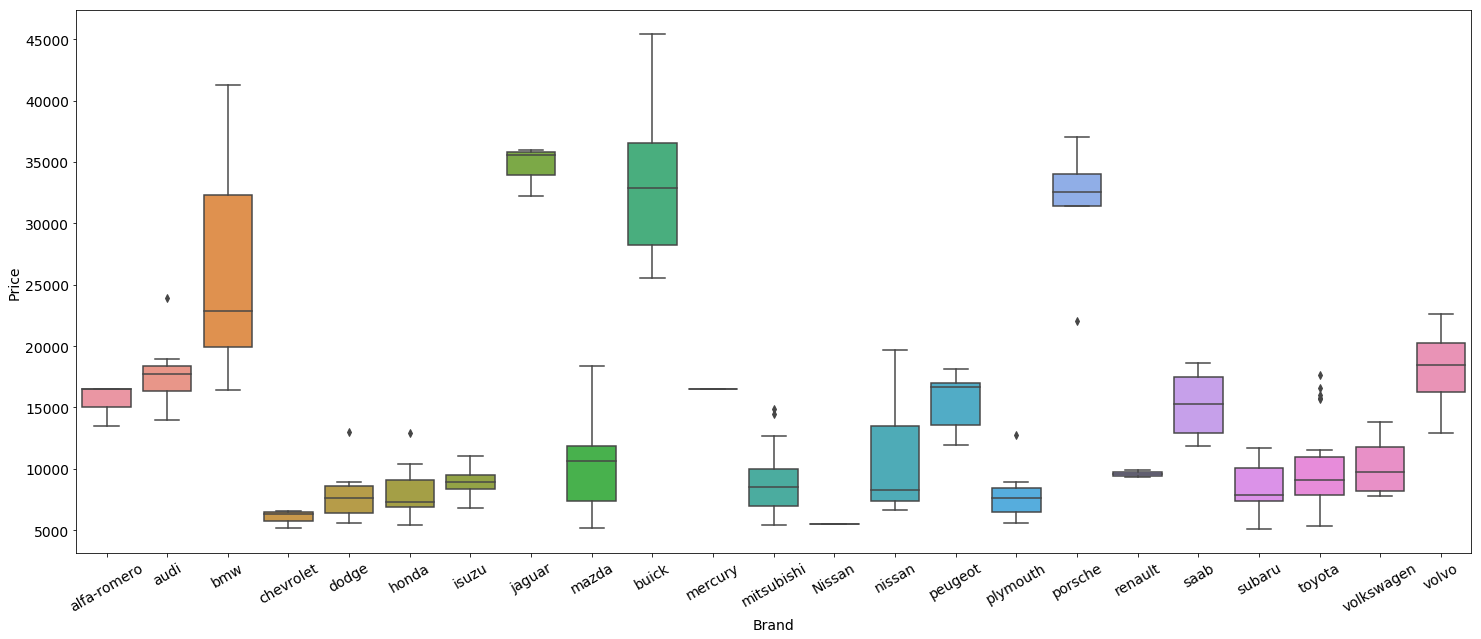

In [17]:
plt.figure(figsize = (25, 10))
sns.boxplot(x = 'Brand', y = 'price', data =cars)
plt.xticks(fontsize=14,rotation=30)
plt.yticks(fontsize=14)
plt.xlabel('Brand',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()

**It can be seen that there is huge variation in Price based on Brand name.**

<font color=green>**Checking Price distribution statistic to check if outlier removal is required.**

In [18]:
cars.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

**Checking values at 99.7 %.(3 standard deviation away)**

In [19]:
round(cars.price.quantile(0.997),2)

42899.98

In [20]:
len(cars.loc[cars.price>43000])

1

<font color=Purple>**There is only one value above 99.7% so it can be left as it is.**

## Treating Categorical columns.

<font color=green>**Replacing the numbers by Category names for better comprehension as per Safety levels provided in data dictionary in symboling as it's a categorical avriable.**

In [21]:
cars=cars.replace({'symboling' : { 3 : 'Risky', 2 : 'Moderate_risk', 1 : 'Little_risk', 0 : 'No_risk', -1 : 'Little_safe', -2 : 'Moderate_safe', -3 : 'Safe' }})

In [22]:
cars.symboling.head(5)

0            Risky
1            Risky
2      Little_risk
3    Moderate_risk
4    Moderate_risk
Name: symboling, dtype: object

<font color=green>**Converting Cylinder number names to numeric ones.**

In [23]:
cars=cars.replace({'cylindernumber' : { 'four' : 4, 'six' : 6, 'five' : 5, 'three' : 3, 'twelve' : 12, 'two' : 2, 'eight' : 8 }})

<font color=green>**Converting doornumber names to numeric ones.**

In [24]:
cars=cars.replace({'doornumber' : { 'four' : 4, 'two' : 2}})

In [25]:
print(cars.cylindernumber.dtype)

int64


In [26]:
print(cars.doornumber.dtype)

int64


In [27]:
cars.cylindernumber.head()

0    4
1    4
2    6
3    4
4    5
Name: cylindernumber, dtype: int64

## Step 3:Checking Data distribution

<font color=green>**Checking the distribution of Numeric variables.**

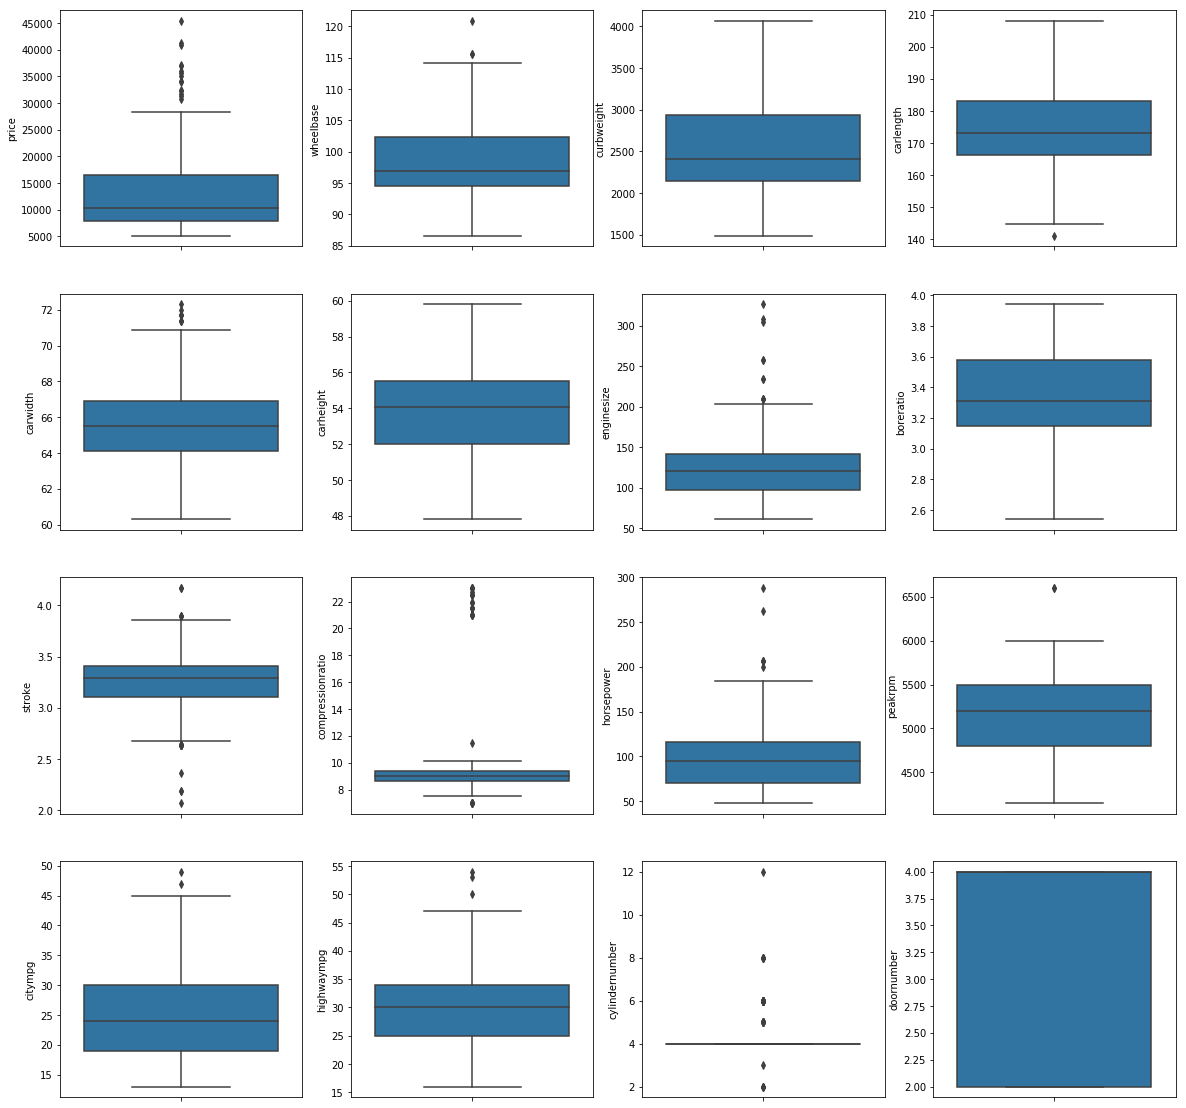

In [28]:
plt.figure(figsize=(20, 20))
plt.subplot(4,4,1)
sns.boxplot(data =cars, x=cars.price,orient='v')
plt.subplot(4,4,2)
sns.boxplot(data =cars, x=cars.wheelbase,orient='v')
plt.subplot(4,4,3)
sns.boxplot(data =cars, x=cars.curbweight,orient='v')
plt.subplot(4,4,4)
sns.boxplot(data =cars, x=cars.carlength,orient='v')
plt.subplot(4,4,5)
sns.boxplot(data =cars, x=cars.carwidth,orient='v')
plt.subplot(4,4,6)
sns.boxplot(data =cars, x=cars.carheight,orient='v')
plt.subplot(4,4,7)
sns.boxplot(data =cars, x=cars.enginesize,orient='v')
plt.subplot(4,4,8)
sns.boxplot(data =cars, x=cars.boreratio,orient='v')
plt.subplot(4,4,9)
sns.boxplot(data =cars, x=cars.stroke,orient='v')
plt.subplot(4,4,10)
sns.boxplot(data =cars, x=cars.compressionratio,orient='v')
plt.subplot(4,4,11)
sns.boxplot(data =cars, x=cars.horsepower,orient='v')
plt.subplot(4,4,12)
sns.boxplot(data =cars, x=cars.peakrpm,orient='v')
plt.subplot(4,4,13)
sns.boxplot(data =cars, x=cars.citympg,orient='v')
plt.subplot(4,4,14)
sns.boxplot(data =cars, x=cars.highwaympg,orient='v')
plt.subplot(4,4,15)
sns.boxplot(data =cars, x=cars.cylindernumber,orient='v')
plt.subplot(4,4,16)
sns.boxplot(data =cars, x=cars.doornumber,orient='v')
plt.show()


<font color=Red>**It can be seen that there are no exceptional outliers.**

<font color=green>**Ploting boxplots of categorical variables.**

In [29]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg        

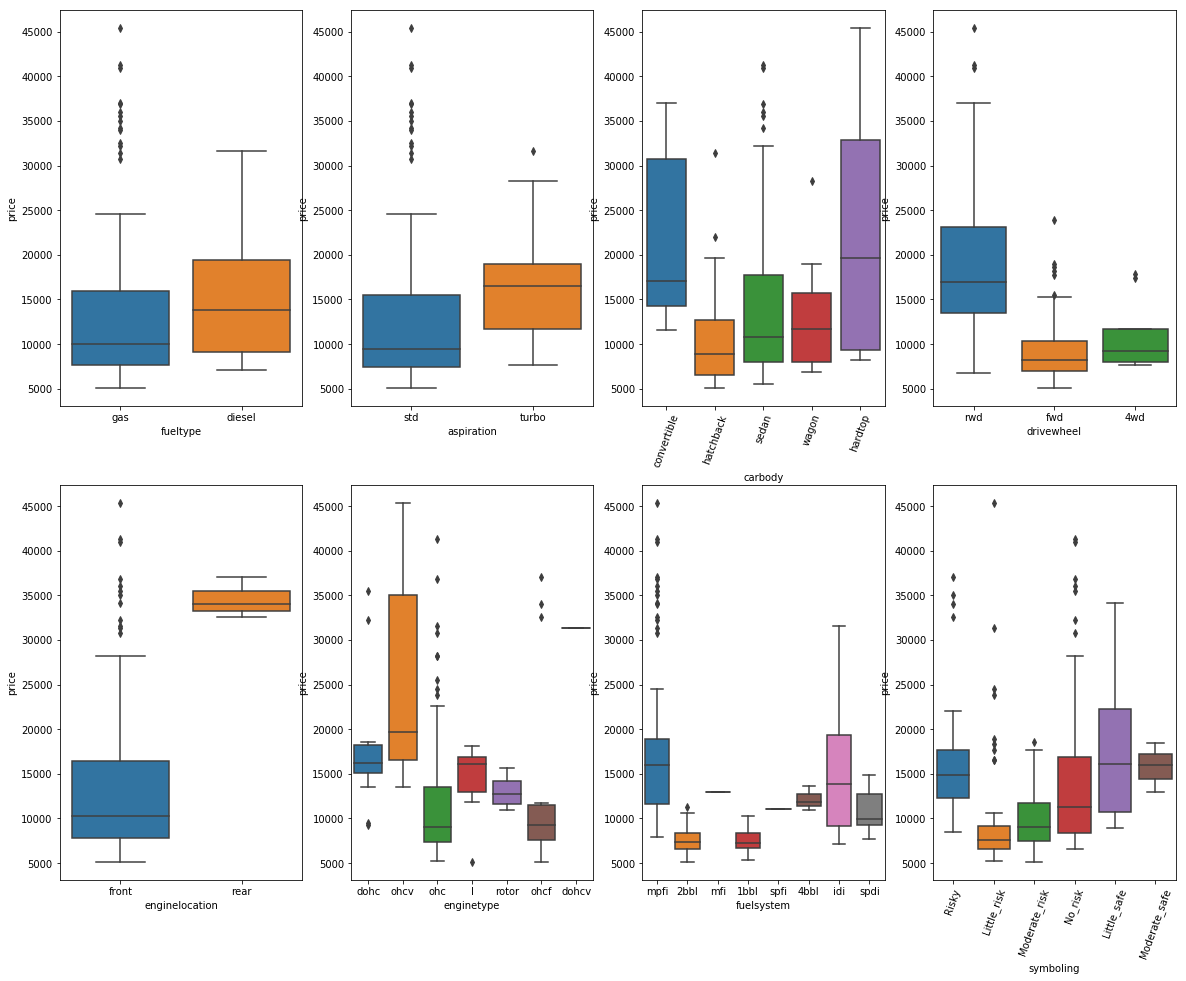

In [30]:
plt.figure(figsize=(20, 16))
plt.subplot(2,4,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(2,4,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(2,4,3)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.xticks(rotation=70)
plt.subplot(2,4,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars)
plt.subplot(2,4,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.subplot(2,4,6)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)
plt.subplot(2,4,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)
plt.subplot(2,4,8)
sns.boxplot(x = 'symboling', y = 'price', data = cars)
plt.xticks(rotation=70)
plt.show()

<font color=Red>**It can be seen that price varies across almost all categories. So detailed analysis is required**

## Step 4:Creating Dummy variables for Categorical columns

In [31]:
brand_dummy = pd.get_dummies(cars['Brand'])
brand_dummy=brand_dummy.drop(['toyota'],axis=1)
cars = pd.concat([cars, brand_dummy], axis = 1)

In [32]:
symbol_dummy = pd.get_dummies(cars['symboling'], drop_first = True)
cars = pd.concat([cars, symbol_dummy], axis = 1)

In [33]:
fuel_dummy = pd.get_dummies(cars['fueltype'], drop_first = True)
cars = pd.concat([cars, fuel_dummy], axis = 1)

In [34]:
asp_dummy = pd.get_dummies(cars['aspiration'], drop_first = True)
cars = pd.concat([cars, asp_dummy], axis = 1)

In [35]:
body_dummy = pd.get_dummies(cars['carbody'], drop_first = True)
cars = pd.concat([cars, body_dummy], axis = 1)

In [36]:
wheel_dummy = pd.get_dummies(cars['drivewheel'], drop_first = True)
cars = pd.concat([cars, wheel_dummy], axis = 1)

In [37]:
engloc_dummy = pd.get_dummies(cars['enginelocation'], drop_first = True)
cars = pd.concat([cars, engloc_dummy], axis = 1)

In [38]:
engtyp_dummy = pd.get_dummies(cars['enginetype'], drop_first = True)
cars = pd.concat([cars, engtyp_dummy], axis = 1)

In [39]:
fuelsys_dummy = pd.get_dummies(cars['fuelsystem'], drop_first = True)
cars = pd.concat([cars, fuelsys_dummy], axis = 1)

In [40]:
cars.shape

(205, 75)

**Dropping Categorical columns after Dummy encoding.**

In [41]:
cars=cars.drop(['symboling','Brand','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem'],axis=1)

In [42]:
cars.shape

(205, 66)

In [43]:
cars.head(5)

,car_ID,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,2,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,3,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,1,0,0,0,0,0,1,0,0
3,4,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,5,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


## Step 5:Evaluating correlation between dependent and independent variables


In [44]:
corr=cars[cars.columns[1:]].corr()['price'][:]
corr=corr.sort_values(ascending=False)
corr=corr.to_frame()

In [45]:
corr.shape

(65, 1)

In [46]:
corr.reset_index(inplace=True)

In [47]:
corr.rename(columns={'index':'column','price':'corr_coeff'},inplace=True)

In [48]:
corr.head()

,column,corr_coeff
0,price,1.000000
1,enginesize,0.874145
2,curbweight,0.835305
3,horsepower,0.808139
4,carwidth,0.759325


In [49]:
corr.tail()

,column,corr_coeff
60,ohc,-0.344270
61,2bbl,-0.501374
62,fwd,-0.601950
63,citympg,-0.685751
64,highwaympg,-0.697599


<font color=Red> **It can be seen that Price has positive and negative correlations with different independent variables.**

## Step 6: Splitting the Data into Training and Testing Sets

In [50]:
from sklearn.model_selection import train_test_split

cars_train, cars_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features using MinMax scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [52]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['price','enginesize','curbweight','horsepower','carheight','carwidth','carlength','doornumber','cylindernumber','wheelbase','boreratio','stroke','compressionratio','peakrpm','citympg','highwaympg']

cars_train[num_vars] = scaler.fit_transform(cars_train[num_vars])

cars_train.head()

,car_ID,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,123,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,...,0,0,0,1,0,0,0,0,0,0
125,126,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,...,0,0,0,0,0,0,0,1,0,0
166,167,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
1,2,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,...,0,0,0,0,0,0,0,1,0,0
199,200,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,...,0,0,0,0,0,0,0,1,0,0


### Dividing into X and Y sets for the model building

In [53]:
y_train = cars_train.pop('price')
X_train = cars_train

In [54]:
cars.shape

(205, 66)

## Step 7:Feature selection using RFE

**By using Recursive feature elimination, selecting top 15 columns out of 23 columns.**

In [55]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
X_train.head()

,car_ID,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,123,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,...,0,0,0,1,0,0,0,0,0,0
125,126,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,...,0,0,0,0,0,0,0,1,0,0
166,167,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
1,2,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,...,0,0,0,0,0,0,0,1,0,0
199,200,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,...,0,0,0,0,0,0,0,1,0,0


In [57]:
# Running RFE with the output number of the variable equal to 15 to select top 15 features 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)            
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 46),
 ('doornumber', False, 39),
 ('wheelbase', False, 12),
 ('carlength', False, 19),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 4),
 ('horsepower', False, 16),
 ('peakrpm', False, 2),
 ('citympg', False, 8),
 ('highwaympg', False, 29),
 ('Nissan', False, 33),
 ('alfa-romero', False, 28),
 ('audi', False, 38),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 22),
 ('dodge', False, 21),
 ('honda', False, 23),
 ('isuzu', False, 34),
 ('jaguar', False, 35),
 ('mazda', False, 45),
 ('mercury', False, 49),
 ('mitsubishi', False, 9),
 ('nissan', False, 36),
 ('peugeot', True, 1),
 ('plymouth', False, 20),
 ('porsche', True, 1),
 ('renault', False, 27),
 ('saab', False, 7),
 ('subaru', False, 25),
 ('volkswagen', False, 44),
 ('volvo', True, 1),
 ('Little_safe', False, 40),
 ('Moderate_risk', Fals

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'bmw', 'buick', 'peugeot', 'porsche', 'volvo',
       'Moderate_safe', 'rear', 'dohcv', 'l'],
      dtype='object')

In [60]:
X_train.columns[~rfe.support_]

Index(['car_ID', 'doornumber', 'wheelbase', 'carlength', 'carheight',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'Nissan', 'alfa-romero', 'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'plymouth',
       'renault', 'saab', 'subaru', 'volkswagen', 'Little_safe',
       'Moderate_risk', 'No_risk', 'Risky', 'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'ohc', 'ohcf', 'ohcv',
       'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [61]:
# Creating X_test dataframe with RFE selected variables
X_train = X_train[col]

In [62]:
X_train.head()

,carwidth,curbweight,cylindernumber,enginesize,boreratio,stroke,bmw,buick,peugeot,porsche,volvo,Moderate_safe,rear,dohcv,l
122,0.291667,0.272692,0.2,0.139623,0.230159,0.525253,0,0,0,0,0,0,0,0,0
125,0.666667,0.500388,0.2,0.339623,1.000000,0.464646,0,0,0,1,0,0,0,0,0
166,0.308333,0.314973,0.2,0.139623,0.444444,0.449495,0,0,0,0,0,0,0,0,0
1,0.316667,0.411171,0.2,0.260377,0.626984,0.247475,0,0,0,0,0,0,0,0,0
199,0.575000,0.647401,0.2,0.260377,0.746032,0.484848,0,0,0,0,1,0,0,0,0


In [63]:
X_train.shape

(143, 15)

<font color= green>**Subsetting RFE selected columnsfrom main dataset 'cars' to create heat map.**

In [64]:
col1=col.tolist()

In [65]:
col1

['carwidth',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'bmw',
 'buick',
 'peugeot',
 'porsche',
 'volvo',
 'Moderate_safe',
 'rear',
 'dohcv',
 'l']

In [66]:
col1.append('price')

In [67]:
col1

['carwidth',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'bmw',
 'buick',
 'peugeot',
 'porsche',
 'volvo',
 'Moderate_safe',
 'rear',
 'dohcv',
 'l',
 'price']

In [68]:
cars_final=cars[col1]

In [69]:
cars_final.shape

(205, 16)

## Step 8:Plotting heat map for independent variables obtained from RFE and Price.

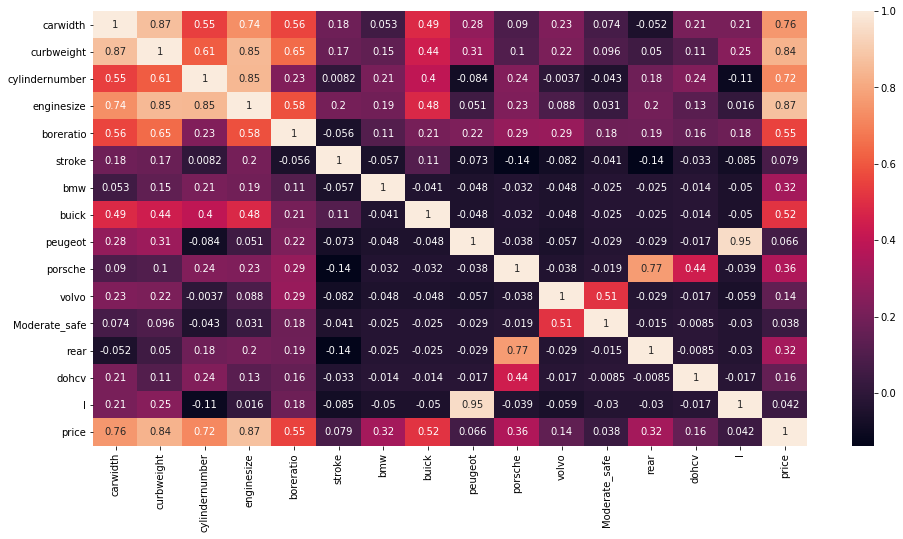

In [70]:
plt.figure(figsize = (16, 8))
sns.heatmap(cars_final.corr(), annot = True)
plt.show()

<font color= Red>**It can be seen that there are many variables which have a very high correlation with Price (eg: enginesize: 0.87). Also, independent variables too have high correlations among themselves indicating multicollinearity.**

## Step 9: Model Building

**Building linear models using statsmodel as we want to interpret results.**

In [71]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train)

In [72]:
#Running the linear model
lm1 = sm.OLS(y_train,X_train_lm).fit()  
#lm1.params

In [73]:
#summary of linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     127.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.64e-69
Time:                        13:22:42   Log-Likelihood:                 215.26
No. Observations:                 143   AIC:                            -398.5
Df Residuals:                     127   BIC:                            -351.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2004      0.064      3.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [74]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
X_train.shape

(143, 15)

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,48.01
0,carwidth,42.37
3,enginesize,32.79
2,cylindernumber,18.82
4,boreratio,11.13
8,peugeot,10.65
14,l,9.52
5,stroke,8.86
9,porsche,3.34
13,dohcv,2.14


**Drop 1:From the summary and the VIF dataframe, variable 'l' has high p value and VIF, so dropping it.**

In [77]:
# Dropping highly correlated variables and insignificant variables

X_train= X_train.drop('l', 1,)

In [78]:
# Build a new model
X_train_lm = sm.add_constant(X_train)

lm2 = sm.OLS(y_train, X_train_lm).fit()
#lm2.params

In [79]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     133.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.59e-69
Time:                        13:22:42   Log-Likelihood:                 213.19
No. Observations:                 143   AIC:                            -396.4
Df Residuals:                     128   BIC:                            -351.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2266      0.064      3.

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,48.00
0,carwidth,41.22
3,enginesize,32.63
2,cylindernumber,18.54
4,boreratio,11.02
5,stroke,8.63
9,porsche,3.34
13,dohcv,2.14
12,rear,2.13
10,volvo,1.81


<font color= green> **Dropping 'l' has reduced adjusted R2 minutely (0.93 to 0.929), AIC has increased slightly, indicating high multicollinearity.**

**Drop 2: p- values are within significance level of 0.05 but VIFs are high for many variables. Dropping cylindernumber first because it has a high VIF and it is least correlated among top variables related with Price. cylindernumber has highest correlation with enginesize (0.85)**

In [81]:
X_train = X_train.drop(["cylindernumber"], axis = 1)

In [82]:
# Build a new model
X_train_lm = sm.add_constant(X_train)

lm3 = sm.OLS(y_train, X_train_lm).fit()
#lm3.params

In [83]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     112.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.27e-63
Time:                        13:22:43   Log-Likelihood:                 196.40
No. Observations:                 143   AIC:                            -364.8
Df Residuals:                     129   BIC:                            -323.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1135      0.028     -4.070

<font color=green>**We can see that dropping cylinder number has reduced adjusted R2 from 0.929 to 0.911 but it has also reduced VIF of remaining variables. AIC also increased slightly indicating penalty on multicollinearity still existent**

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,45.27
0,carwidth,36.36
2,enginesize,18.19
3,boreratio,10.85
4,stroke,8.44
8,porsche,3.25
11,rear,2.09
12,dohcv,2.06
9,volvo,1.81
10,Moderate_safe,1.56


**Drop 3: stroke has high p value and VIF and has very low correlation of 0.079 with price so dropping it.**

In [85]:
X_train = X_train.drop(["stroke"], axis = 1)

In [86]:
# Build a new model
X_train_lm = sm.add_constant(X_train)

lm4 = sm.OLS(y_train, X_train_lm).fit()
#lm4.params

In [87]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     120.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.50e-64
Time:                        13:22:44   Log-Likelihood:                 195.52
No. Observations:                 143   AIC:                            -365.0
Df Residuals:                     130   BIC:                            -326.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1382      0.020     -6.910

<font color=green>**It can be seen that dropping stroke has caused negligible reduction in adjusted R2 (0.911 to 0.910). AIC has now slightly reduced indicating slightly decreased penalty on multicollinearity**

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,45.24
0,carwidth,25.74
2,enginesize,18.15
3,boreratio,10.82
7,porsche,3.18
10,rear,2.08
11,dohcv,2.04
8,volvo,1.68
9,Moderate_safe,1.56
6,peugeot,1.43


**Drop 4: dohcv has very high p value but low VIF i.e. it is insignificant to the model and doesn't have significant multicollinearity with other variables. Also it has a very low correlation with price (0.16) So dropping ohc.**

In [89]:
X_train = X_train.drop(["dohcv"], axis = 1)

In [90]:
# Build a new model
X_train_lm = sm.add_constant(X_train)

lm5 = sm.OLS(y_train, X_train_lm).fit()
#lm5.params

In [91]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     132.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.13e-65
Time:                        13:22:44   Log-Likelihood:                 195.51
No. Observations:                 143   AIC:                            -367.0
Df Residuals:                     131   BIC:                            -331.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1384      0.020     -6.976

<font color= green>**Dropping dohcv has increased the adjusted R2 slightly. (0.910 to 0.911). AIC also further reduced from (-365 to -367)**

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,45.17
0,carwidth,25.51
2,enginesize,18.11
3,boreratio,10.68
8,volvo,1.68
7,porsche,1.67
10,rear,1.59
9,Moderate_safe,1.56
6,peugeot,1.43
5,buick,1.30


**Drop 5: Dropping carwidth as it has high VIF and high correlation with curbweight and enginesize.Also correlation of carwidth with price is lower than these two.**

In [93]:
X_train = X_train.drop(["carwidth"], axis = 1)

In [94]:
# Build a new model
X_train_lm = sm.add_constant(X_train)

lm6= sm.OLS(y_train, X_train_lm).fit()
#lm6.params

In [95]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.27e-63
Time:                        13:22:44   Log-Likelihood:                 187.67
No. Observations:                 143   AIC:                            -353.3
Df Residuals:                     132   BIC:                            -320.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0946      0.017     -5.500

<font color=green>**Dropping carwidth has reduced adjusted R2 from 0.911 to 0.901. AIC also slightly decreased but we need to tweak the model further to treat multicollinearity and insignificance.**

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,29.93
1,enginesize,18.08
2,boreratio,8.85
7,volvo,1.68
6,porsche,1.65
8,Moderate_safe,1.54
9,rear,1.53
5,peugeot,1.41
4,buick,1.29
3,bmw,1.14


**However dropping carwidth has reduced VIF.**

**Drop 6: for boreratio p value is now highest but VIF is low. that means it is insignificant to the model, so dropping it.Also its correlation with price is also moderate (0.55)**

In [97]:
X_train = X_train.drop(["boreratio"], axis = 1)

In [98]:
# Build a new model
X_train_lm = sm.add_constant(X_train)

lm7= sm.OLS(y_train, X_train_lm).fit()


In [99]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     142.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.58e-64
Time:                        13:22:45   Log-Likelihood:                 186.00
No. Observations:                 143   AIC:                            -352.0
Df Residuals:                     133   BIC:                            -322.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1126      0.014     -8.074

In [100]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,19.18
1,enginesize,17.88
6,volvo,1.67
5,porsche,1.58
8,rear,1.53
7,Moderate_safe,1.50
4,peugeot,1.41
3,buick,1.21
2,bmw,1.14


<font color=green>**Dropping boreratio has caused minor decline in adjusted R2 (0.901 to 0.900)**

**Drop 7: curbweight as it has highest VIF.**

In [101]:
X_train = X_train.drop(["curbweight"], axis = 1)

In [102]:
# Build a new model
X_train_lm = sm.add_constant(X_train)

lm8 = sm.OLS(y_train, X_train_lm).fit()


print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     101.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.02e-53
Time:                        13:22:45   Log-Likelihood:                 156.86
No. Observations:                 143   AIC:                            -295.7
Df Residuals:                     134   BIC:                            -269.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0430      0.013     -3.184

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.59
5,volvo,1.59
4,porsche,1.58
6,Moderate_safe,1.50
7,rear,1.50
2,buick,1.20
1,bmw,1.14
3,peugeot,1.09


**Dropping curbweight has brought all VIFs to below 5 level but it has reduced adjusted R2 from 0.900 to 0.85.**

**Drop 8: 'rear' as it has high p value indicating insignificance to the model.**

In [104]:
X_train= X_train.drop(["rear"], axis = 1)

In [105]:
# Build a new model
X_train_lm = sm.add_constant(X_train)

lm9 = sm.OLS(y_train, X_train_lm).fit()
#lm9.params

print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     115.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.24e-54
Time:                        13:22:46   Log-Likelihood:                 155.85
No. Observations:                 143   AIC:                            -295.7
Df Residuals:                     135   BIC:                            -272.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0435      0.014     -3.212

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.59
5,volvo,1.59
6,Moderate_safe,1.50
2,buick,1.20
1,bmw,1.14
3,peugeot,1.09
4,porsche,1.09


**Dropping 'rear' has brought very minor decline in adjusted R2 (0.85 to 0.849).**

**Drop 9: 'peugeot' as its p value has increased making it insignificant to the model.**

In [107]:
X_train= X_train.drop(["peugeot"], axis = 1)

In [108]:
# Build a new model
X_train_lm = sm.add_constant(X_train)

lm10= sm.OLS(y_train, X_train_lm).fit()
#lm10.params

print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     131.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.89e-54
Time:                        13:22:46   Log-Likelihood:                 154.12
No. Observations:                 143   AIC:                            -294.2
Df Residuals:                     136   BIC:                            -273.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0428      0.014     -3.135

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,volvo,1.58
5,Moderate_safe,1.50
0,enginesize,1.46
2,buick,1.18
1,bmw,1.13
3,porsche,1.08


<font color=darkblue> **Dropping 'peugeot' has caused very minute change in adjusted R2 (0.849 to 0.847). Now all VIFs are below 5 and all p values are below significance 0.05.AIC has remained stable ~-295 in last three models. So this is (lm10) becomes the final model.**

## Step 10:Residual Analysis of the train data

In [110]:
X_train_lm.shape

(143, 7)

In [111]:
y_train.shape

(143,)

In [112]:
y_train_price = lm10.predict(X_train_lm)

In [113]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Errors')

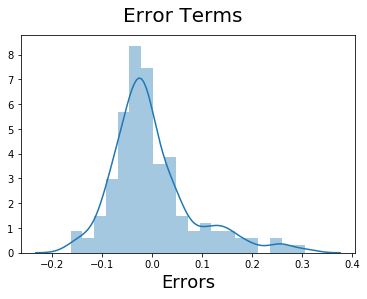

In [114]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [115]:
(y_train - y_train_price).mean()

-3.3772518581254765e-17

<font color=darkblue>**Inference: It can be clearly seen that error terms are almost normally distributed and the mean of errors is infinitesimally small(limiting Zero) So the model lm10 is a good model.**

In [116]:
# Apply scaler() to all the columns in test data set except the'dummy' variables

num_vars =['price','enginesize','curbweight','horsepower','carheight','carwidth','carlength','doornumber','cylindernumber','wheelbase','boreratio','stroke','compressionratio','peakrpm','citympg','highwaympg']
cars_test[num_vars] = scaler.transform(cars_test[num_vars])

cars_test.head()

,car_ID,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,161,1.0,0.313793,0.409756,0.341667,0.460177,0.235066,0.2,0.139623,0.404762,...,0,0,0,1,0,0,0,0,0,0
186,187,1.0,0.368966,0.497561,0.433333,0.699115,0.305275,0.2,0.181132,0.404762,...,0,0,0,0,0,0,0,1,0,0
59,60,0.0,0.420690,0.596748,0.516667,0.522124,0.347944,0.2,0.230189,0.563492,...,0,0,0,1,0,0,0,0,0,0
165,166,0.0,0.272414,0.448780,0.308333,0.424779,0.301396,0.2,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
140,141,0.0,0.231034,0.263415,0.291667,0.699115,0.291699,0.2,0.177358,0.746032,...,1,0,0,1,0,0,0,0,0,0


#### Dividing into X_test and y_test

In [117]:
y_test = cars_test.pop('price')   #Extracting price column as y variable.
X_test = cars_test

In [118]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [119]:
# Making predictions
y_pred = lm10.predict(X_test_new)

## Step 11:Model Evaluation

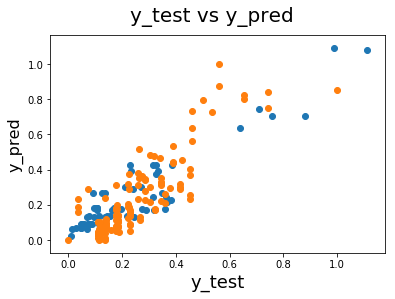

In [120]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.show()

In [121]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [122]:
print('Mean_Squared_Error :' ,round(mse,4))
print('r_square_value :',round(r_squared,4))

Mean_Squared_Error : 0.0073
r_square_value : 0.8628


<font color=green> **Conclusion:1.Adjusted R2 for train data was 0.847 whereas R2 value for test set is 0.8628. These two are very close. Hence the model created is useful to Predict the car prices.2. higher variance in error exists at higher price levels. This occurs due to less number of data points available at higher levels.**

**The equation of this model can be written as-**

In [123]:
lm10.params

const           -0.042773
enginesize       0.964036
bmw              0.248598
buick            0.237782
porsche          0.264055
volvo            0.178339
Moderate_safe   -0.168439
dtype: float64

$ price = -0.042773 + 0.964036  \times  enginesize + 0.248598  \times  bmw + 0.237782 \times buick + 0.264055 \times porsche + 0.178339 \times volvo  -0.168439 \times Moderate safe $


## Result interpretation-

<font color=darkblue>**1. The above equation tells us that- As the enginesize gets bigger, price increases and price for less safer cars are lower. Since for symboling, 'Safe' was the base case, the equation indicates that "moderately safe cars" are lower priced than "Safe cars".**

<font color=green>**2. Since 'Toyota' is the reference case for Brand, the equation tells us that- BMW, Buick, Porsche and Volvo cars are higher priced thanToyota and have higher brand value (equivant to coefficient in equation) example: BMW cars are 0.248598 times pricier than Toyota.**

<font color=red>**3. The most prominent car features deriving value are enginesize and Safety. Rest depends on Brand value mostly. Since other car features are correlated with enginsize and safety only.**

<font color=green>**4. The constant of ~0 indicates, with no features or brand value, Car price is Zero.**

<font color=darkblue>**P.S.:The model was also checked with Price outliers removed. However model accuracy remained almost same with more stress on Brand names. The error distribution also looked same as this. However this model (without outlier removed) was chosen due to better test prediction efficiency.**